# Adaptive Intelligence COM3240
## Lab 5: Reinforcement Learning [solution]

### Learning Outcomes
- Understand how reinforcement learning works.
- Ability to develop a simple reinforcement learning scenario.

## Laboratory 5: Reinforcement Learning

### Setup
The scenario is structured as follows: a monkey is presented with one of two images, one representing a balloon and the other a bicyle, and it must respond by pressing either the Red or Green button.

Every time the balloon is presented and the monkey presses the Green button, it receives a bit of juice (reward). Similarly, if the bicycle is presented and the Red button is pressed, it again receives juice. No other combination is rewarded. In this simple setup, your monkey, child, or artificial agent can learn a specific mapping ('Balloon −> Green' and 'Bicycle −> Red') from rewards.

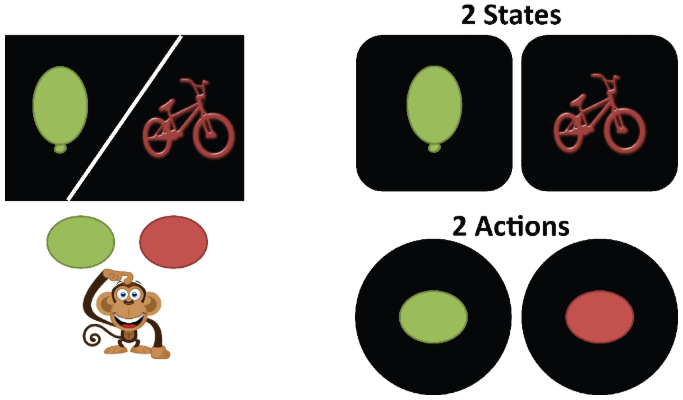

### Exercises

**1. Write code that implements this scenario**
- The artificial agent can find itself in two states, ”bicycle” or ”balloon”, with equal probabilities. You can use a random generator (numpy.random.rand) to achieve this. 
- From each of the two states, it can choose two actions Red or Green, based on the Q values of the state-action pair. 
- You can use the update rule for Q values we covered in the class in order to learn the optimal actions. Initialise the Qs randomly between 0 and 1 (rand). You can use a Greedy policy. 
- Pre-define the number of consequent presentations (trials). If in difficulties with setting up variables, please ask the demonstrators for help. 
- Note: In order to make the algorithm work, you need to find appropriate parameters. Try different values for the learning rate.


**2. Plot the average total reward as a function of the trials.**
- This is the learning curve and successful learning means that the reward increases as the trial number increases (up to a maximum value). 
- If in difficulties with plotting commands, please ask the demonstrators.


**3. Repeat this procedure many times and show an average learning curve.** 
- The procedure needs to be repeated in order to draw conclusions. Can you explain why this is the case?
- Repeat it 10 times and plot the average graph with errorbars (commands mean and errorbar).


**4. Would the use of an epsilon-greedy policy make any difference in this case?**
- Modify your code accordingly and explain your results. 
- What is the best value for epsilon in this case and for which reason?


**5. Change the rules of the game.** 
- Set the initial Q values to zero. 
- Change the rewards. In case of a wrong response, a small reward of 0.1 is administered. In case of a correct response, a reward of 10 with probability 1/10 is given (i.e. in 1 out of 10 cases). 
- Would you be able to achieve maximum reward with the parameters you have used earlier? If not, how should you change the learning rate and the epsilon parameter?

####  Function that returns the rewards for each trial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## this function makes it easier to switch from the normal reward to 
## the changed reward from exercise 5
def give_reward(success, rfail = 0.1, rsuccess = 10.0, p = 0.1):
    if success:
        return rsuccess if (np.random.rand() < p) else 0.0
    else:
        return rfail

def monkey(nTrials, learningRate, epsilon, rfail=0.0, rsuccess=1.0, p=1.0):

    Qvalue = np.random.rand(2,2)

    Red = 0
    Green = 1

    Balloon = 0
    Bicycle = 1

    Rewards = np.zeros((1,nTrials))

    for trial in range(nTrials):
        #Present a picture / state Balloon=1 Bicycle=2
        Image = np.random.randint(2) # Half times Balloon, half times Bicycle

        # with probability epsilon choose action at random if epsilon=0 then always choose Greedy
        eGreedy = int(np.random.rand() < epsilon)  

        if Qvalue[Image,Red] == Qvalue[Image,Green] or eGreedy:
            # if Qvalues are the same or epsilon > 0 
            # (e-Greedy, chose at random with probability epsilon) choose one at random
            Action = np.random.randint(2)  
        else:
            # will result Action=1 (Green) if Qvalue(Image,Green)>Qvalue(Image,Red) 
            # and Action=0 (Red) otherwise (Greedy)
            Action = int(Qvalue[Image,Green] > Qvalue[Image,Red]) 

        # Collect reward
        success = ( (Image == Balloon) and (Action == Green) ) or ( (Image == Bicycle) and (Action == Red) )
        r = give_reward(success, rfail, rsuccess, p)

        # Update Q values
        Qvalue[Image,Action] = Qvalue[Image,Action] + learningRate * (r - Qvalue[Image,Action])

        # Store reward
        Rewards[0,trial] = r

    return Rewards

#### Script that calls the function `monkey`

In [3]:
#This script calls the function monkey (1 run)

#Parameter setup
nTrials = 100        # should be integer >0
learningRate = 0.5   # should be real, Greater than 0
epsilon = 0.20       # should be real, Greater or Equal to 0; epsilon=0 Greedy, otherwise epsilon-Greedy

repetitions = 1000   # should be integer, greater than 0; for statistical reasons

epsilons = np.linspace(0.0, 1.0, 6)
n_epsilons = len(epsilons)
totalRewards = np.zeros((repetitions, nTrials, n_epsilons))

fontSize = 18

# Set up the deterministic reward
rfail = 0
rsuccess = 1
p = 1.0

for k in range(n_epsilons): # try multiple values of epsilon
    for j in range(repetitions):
        totalRewards[j,:,k] = monkey(nTrials, learningRate, epsilons[k], rfail, rsuccess, p)

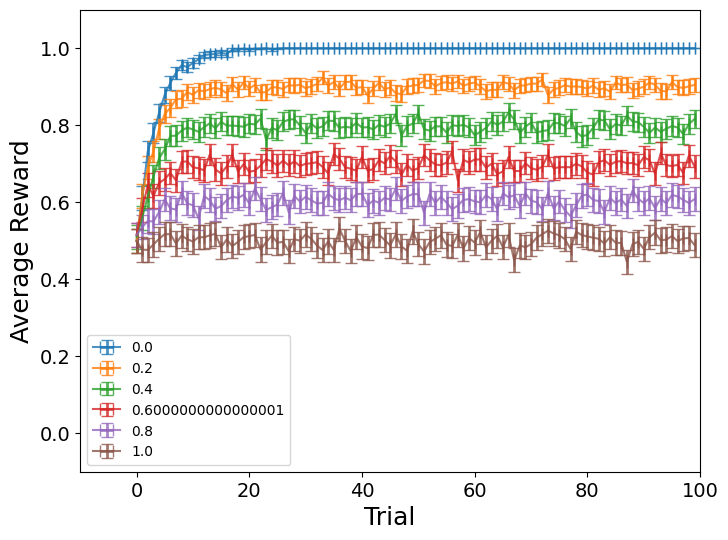

In [4]:
plt.figure(figsize = (8, 6))

# error bars for exercise 3
for k in range(n_epsilons):
    # calculate mean 
    means = np.mean(totalRewards[:,:,k], axis = 0)
    # errorbars are equal to twice standard error i.e. std/sqrt(samples)
    errors = 2 * np.std(totalRewards[:,:,k], axis = 0) / np.sqrt(repetitions) 
    plt.errorbar(np.arange(nTrials), means, errors, 0, elinewidth = 2, capsize = 4, alpha =0.8, label=str(epsilons[k]))

plt.legend()
plt.xlabel('Trial',fontsize = fontSize)
plt.ylabel('Average Reward',fontsize = fontSize)
plt.axis((-(nTrials/10.0), nTrials ,-0.1, 1.1))
plt.tick_params(axis = 'both', which='major', labelsize = 14)
plt.show()

For the initial task, exploration is not very important as there are only a small set of states and actions. When using the e-greedy policy, the Q-values are learnt quickly and then the random actions reduce the average reward, which theoretically should be 
$$ E\left(r\right)=1-\frac{\varepsilon }{2} $$
so the optimal value is $\varepsilon = 0$. This will depend on the initial Q-values and what happens for tied Q-values.

In [5]:
nTrials = 1000
learningRate = 0.01  # should be real, Greater than 0
epsilon = 0.1        # should be real, Greater or Equal to 0; epsilon=0 Greedy, otherwise epsilon-Greedy

repetitions = 1000   # should be integer, greater than 0; for statistical reasons

epsilons = np.linspace(0.0, 1.0, 6)
n_epsilons = len(epsilons)
totalRewards2 = np.zeros((repetitions, nTrials))

# Set up the random reward
rfail = 0.1
rsuccess = 10
p = 0.1

for j in range(repetitions):
    totalRewards2[j,:] = monkey(nTrials, learningRate, epsilon, rfail, rsuccess, p)

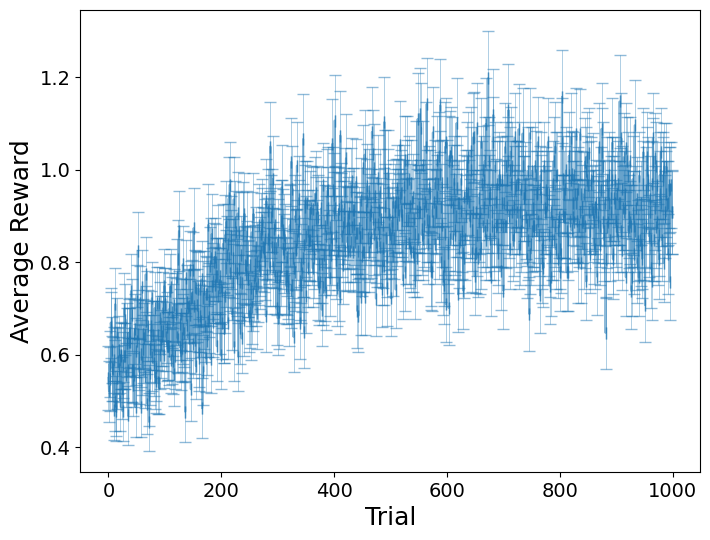

In [8]:
plt.figure(figsize = (8, 6))
means = np.mean(totalRewards2, axis = 0)
# errorbars are equal to standard error i.e. std/sqrt(samples)
errors = np.std(totalRewards2, axis = 0) / np.sqrt(repetitions) 
plt.errorbar(np.arange(nTrials), means, errors, 0, elinewidth = 0.5, capsize = 4, alpha =0.5)

plt.xlabel('Trial',fontsize = fontSize)
plt.ylabel('Average Reward',fontsize = fontSize)
#plt.axis((-(nTrials/10.0), nTrials ,-0.1, 1.1))
plt.tick_params(axis = 'both', which='major', labelsize = 14)
plt.show()

Now the success reward is random so there is a high chance that the agent will think the wrong action is the better one to take initially. It is important to use a low learning rate and a longer number of trials to learn the Q-values properly. Exploring will be more important here to force the agent to try new actions in case it initially learns the wrong action. Now the theoretical average reward will be 
$$ E\left(r\right)=\left(1-\frac{\varepsilon }{2}\right)Q^* \left(\mathrm{correct}\right)+\frac{\varepsilon }{2}Q^* \left(\mathrm{wrong}\right)=\left(1-\frac{\varepsilon }{2}\right)+\frac{\varepsilon }{2}\frac{1}{10}.$$
The best case is still when $\varepsilon=0$ but even a large epsilon will give better performance than a Greedy policy since there is a high chance the Greedy policy will learn the incorrect action. A small or decaying $\varepsilon$ will be best. 